In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns

In [159]:
# Fuentes sacadas del INE
fuente_2 = "../../data/evolucion_del_precio_de_la_vivienda_en_madrid.csv"
df_2 = pd.read_csv(fuente_2, sep=";")
fuente_3 = "../../data/la_renta_bruta_media_de_madrid.csv"
df_3 = pd.read_csv(fuente_3, sep=";")
fuente_4 = "../../data/ipva_mad_tam.csv"
df_4 = pd.read_table(fuente_4, sep=";")
fuente_5 = "../../data/ipva_mad_vivienda.csv"
df_5 = pd.read_csv(fuente_5, sep=";")
fuente_6 = "../../data/ipva_mad_contrato.csv"
df_6 = pd.read_csv(fuente_6,  sep=";")
# Fuente media renta en madrid INE
fuente_8 = "../../data/salario_mad_medio.csv"
df_8 = pd.read_csv(fuente_8, sep=";")

In [160]:
df_2

,Año,Periodo,Madrid﻿,España
0,2007,Trimestre 2,"3.497,8",NaN
1,2007,Trimestre 3,"3.551,19",NaN
2,2007,Trimestre 4,"3.364,98",NaN
3,2008,Trimestre 1,"3.323,59",NaN
4,2008,Trimestre 2,"3.268,73",NaN
...,...,...,...,...
263,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN
265,"Url:""https://www.epdata.es/comparacion-evoluci...",NaN,NaN,NaN
266,"Titulo:""Evolución del precio de la vivienda en...",NaN,NaN,NaN


In [161]:
df_2.head(248)

,Año,Periodo,Madrid﻿,España
0,2007,Trimestre 2,"3.497,8",NaN
1,2007,Trimestre 3,"3.551,19",NaN
2,2007,Trimestre 4,"3.364,98",NaN
3,2008,Trimestre 1,"3.323,59",NaN
4,2008,Trimestre 2,"3.268,73",NaN
...,...,...,...,...
243,2023,Junio,NaN,1.622
244,2023,Julio,NaN,1.617
245,NaN,NaN,NaN,NaN
246,NaN,NaN,NaN,NaN


In [162]:
df_2.columns = ["anno", "period", "madrid", "spain"]
df_2.drop(axis=1, columns="spain",inplace=True)
df_2.drop(axis=0, index=df_2.loc[245:].index,inplace=True )

In [163]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   anno    245 non-null    object
 1   period  245 non-null    object
 2   madrid  46 non-null     object
dtypes: object(3)
memory usage: 5.9+ KB


In [164]:
df_2["madrid"] = df_2["madrid"].str.replace(".", "")
df_2["madrid"] = df_2["madrid"].str.replace(",", ".")
df_2

,anno,period,madrid
0,2007,Trimestre 2,3497.8
1,2007,Trimestre 3,3551.19
2,2007,Trimestre 4,3364.98
3,2008,Trimestre 1,3323.59
4,2008,Trimestre 2,3268.73
...,...,...,...
240,2023,Marzo,NaN
241,2023,Abril,NaN
242,2023,Mayo,NaN
243,2023,Junio,NaN


In [165]:
df_2["madrid"] = pd.to_numeric(df_2["madrid"], errors="coerce")
df_2


,anno,period,madrid
0,2007,Trimestre 2,3497.80
1,2007,Trimestre 3,3551.19
2,2007,Trimestre 4,3364.98
3,2008,Trimestre 1,3323.59
4,2008,Trimestre 2,3268.73
...,...,...,...
240,2023,Marzo,NaN
241,2023,Abril,NaN
242,2023,Mayo,NaN
243,2023,Junio,NaN


In [182]:
df_2mean = df_2[df_2["madrid"].notna()].groupby("anno")["madrid"].describe()

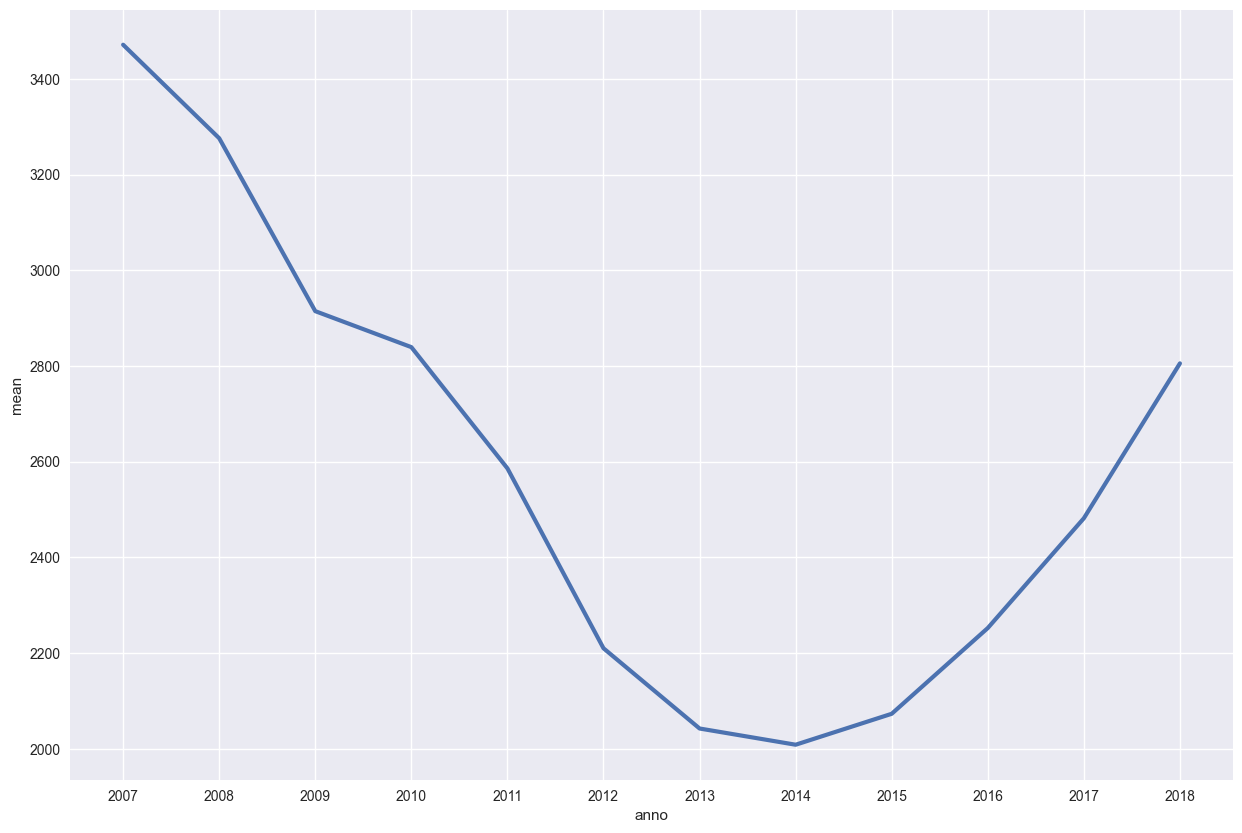

In [183]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_2mean,
             x="anno",
             y="mean",
            linewidth = 3);

In [222]:
fuente_4 = "../../data/ipva_mad_tam.csv"
df_4 = pd.read_table(fuente_4, sep=";")
fuente_5 = "../../data/ipva_mad_vivienda.csv"
df_5 = pd.read_csv(fuente_5, sep=";")
fuente_6 = "../../data/ipva_mad_contrato.csv"
df_6 = pd.read_csv(fuente_6,  sep=";")

In [223]:
df_4.drop(axis=1,columns=["Total Nacional","Comunidades y Ciudades Autonomas","Tipo de dato"], inplace=True)
df_4

,Tamano de la vivienda,Periodo,Total
0,Total,2021,"112,539"
1,Total,2020,"111,433"
2,Total,2019,"110,717"
3,Total,2018,"106,485"
4,Total,2017,"103,653"
...,...,...,...
93,>150,2019,"2,2"
94,>150,2018,"1,9"
95,>150,2017,"1,8"
96,>150,2016,"1,1"


In [236]:
df_4["Total"] = df_4["Total"].str.replace(",", ".")
df_4["Total"] = df_4["Total"].to_numpy(dtype=np.float32)

In [248]:
df_4_mad = df_4.groupby(["Tamano de la vivienda",'Periodo']).sum()
df_4_mad.reset_index(inplace=True)
df_4_mad

,Tamano de la vivienda,Periodo,Total
0,(120-150],2015,100.500000
1,(120-150],2016,102.954002
2,(120-150],2017,104.709000
3,(120-150],2018,107.812004
4,(120-150],2019,111.470001
5,(120-150],2020,109.023994
6,(120-150],2021,111.085999
7,(60-75],2015,100.099998
8,(60-75],2016,103.772003
9,(60-75],2017,105.324997


Text(0.5, 1.0, 'Evolución tamaño de la vivienda en Madrid')

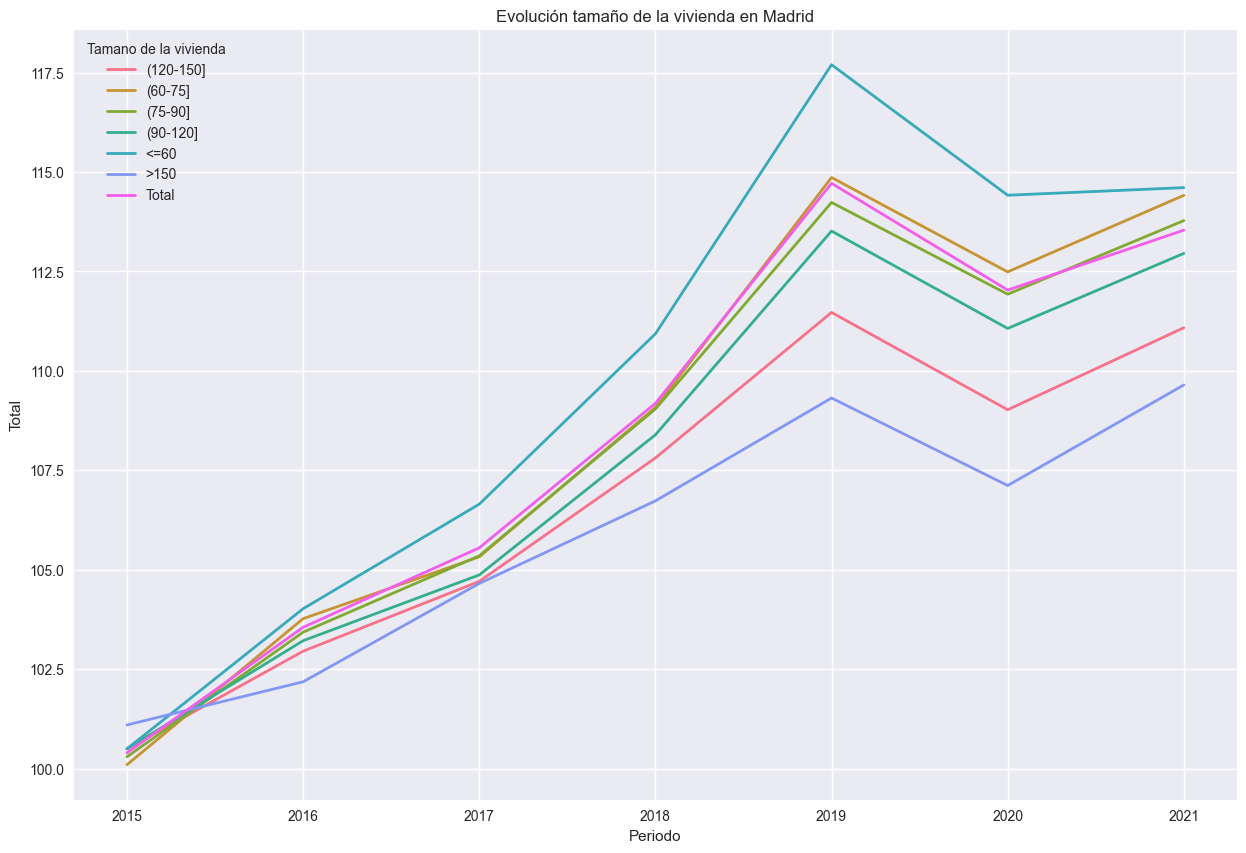

In [252]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_4_mad,
             x="Periodo",
             y="Total",
             hue="Tamano de la vivienda",
            linewidth = 2);
plt.title("Evolución tamaño de la vivienda en Madrid")

In [224]:
df_5.drop(axis=1,columns=["Total Nacional","Comunidades y Ciudades Autonomas","Tipo de dato"], inplace=True)
df_5

,Tipo de edificacion,Periodo,Total
0,Total,2021,"112,539"
1,Total,2020,"111,433"
2,Total,2019,"110,717"
3,Total,2018,"106,485"
4,Total,2017,"103,653"
5,Total,2016,"101,755"
6,Total,2015,"100,000"
7,Total,2021,"1,0"
8,Total,2020,"0,6"
9,Total,2019,"4,0"


In [253]:
df_5_mad = df_5.groupby(["Tipo de edificacion",'Periodo']).sum()
df_5_mad.reset_index(inplace=True)
df_5_mad

,Tipo de edificacion,Periodo,Total
0,Total,2015,"100,0000,4"
1,Total,2016,"101,7551,8"
2,Total,2017,"103,6531,9"
3,Total,2018,"106,4852,7"
4,Total,2019,"110,7174,0"
5,Total,2020,"111,4330,6"
6,Total,2021,"112,5391,0"
7,Vivienda colectiva,2015,"100,0000,4"
8,Vivienda colectiva,2016,"101,7871,8"
9,Vivienda colectiva,2017,"103,7011,9"


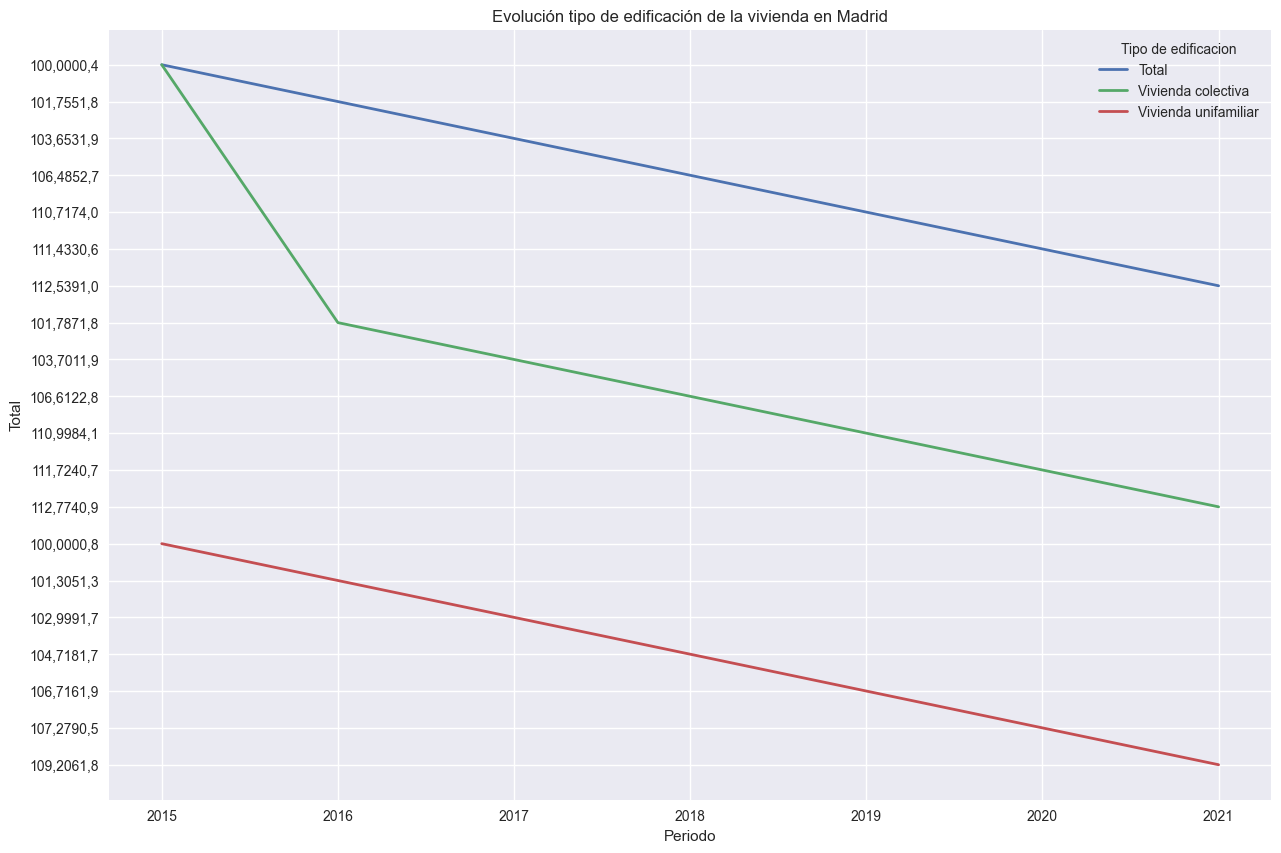

In [257]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_5_mad,
             x="Periodo",
             y="Total",
             hue="Tipo de edificacion",
            linewidth = 2);
plt.title("Evolución tipo de edificación de la vivienda en Madrid");